<a href="https://colab.research.google.com/github/pimaximilian/petfinder/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive and Imports

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Installs

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wrds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s eta 0:00:00


In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [ ]:
from sympy import *
from sympy.abc import a, b, i, k, m, n, x
from sympy import Product, oo
import sympy as sp

import pandas as pd
import numpy as np

import requests

from scipy.stats import norm

import itertools

import matplotlib.pyplot as plt

import pandas_datareader as pdr

import datetime

import import_ipynb

import requests
import json

import math
import random

from dateutil.relativedelta import relativedelta

import itertools

import statsmodels.api as sm

from prophet import Prophet

from tqdm import tqdm

import logging

from sklearn.model_selection import train_test_split

In [ ]:
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

In [ ]:
# Change the working directory to the directory containing the .ipynb file
%cd /content/gdrive/MyDrive/Thesis

import os
filenames = os.listdir('.')
for filename in filenames:
    print(os.path.basename(filename))

/content/gdrive/MyDrive/Thesis
annurev-financial-101521-104735.pdf
BBG_2023_04_15.xlsx
.ipynb_checkpoints
BBG_23_04_15.pickle
Functions.ipynb
BBG_230415prophets.pickle
Thesis_Zhongzhou Yang.pdf
CFD_code_pdf.pdf
Main.ipynb
CFD_Portfolio_Bitcoin_final.ipynb


In [ ]:
import Functions

importing Jupyter notebook from Functions.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Get Data

## Data from alphavantage (US stocks and ARDs on international equity)

In [ ]:
import requests


api_key = 'UHZRH3WERMUPWONL'

# set the API endpoint and parameters
url = "https://www.alphavantage.co/query"
params = {
    "function": "SYMBOL_SEARCH",
    "keywords": "Germany",
    "apikey": api_key
}

# send a GET request to the API endpoint
response = requests.get(url, params=params)

# parse the JSON response and extract the list of German stocks
data = response.json()
german_stocks = [result["1. symbol"] for result in data["bestMatches"]]

# print the list of German stocks
print(german_stocks)

['.DEX']


In [ ]:
#https://www.alphavantage.co/documentation/#intraday-extended

import csv
import requests

api_key = 'UHZRH3WERMUPWONL'
symbols = ['SAP']
#, 'MSFT']

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
for symbol in symbols:
  CSV_URL = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol={symbol}&interval=1min&slice=year1month1&apikey={api_key}'

  with requests.Session() as s:
      download = s.get(CSV_URL)
      decoded_content = download.content.decode('utf-8')
      cr = csv.reader(decoded_content.splitlines(), delimiter=',')
      my_list = list(cr)
      df = pd.DataFrame(my_list)
      df.columns = df.iloc[0,:]
      df = df.iloc[1:,:]
      df["time"] = pd.to_datetime(df["time"])
      df = df.set_index(df["time"])
      df = df.drop("time", axis = 1)
      df = df.astype(float)

In [ ]:
df

,open,high,low,close,volume
time,,,,,
2023-04-19 17:02:00,126.110,126.110,126.1100,126.11,300.0
2023-04-19 16:00:00,127.290,127.300,127.2600,127.30,13980.0
2023-04-19 15:59:00,127.265,127.300,127.2650,127.29,9231.0
2023-04-19 15:58:00,127.250,127.285,127.2475,127.26,9647.0
2023-04-19 15:57:00,127.290,127.290,127.2400,127.25,5419.0
...,...,...,...,...,...
2023-03-21 09:33:00,122.590,122.650,122.5400,122.59,3772.0
2023-03-21 09:32:00,122.550,122.650,122.5500,122.55,2954.0
2023-03-21 09:31:00,122.430,122.530,122.4000,122.53,12073.0


<Axes: xlabel='time'>

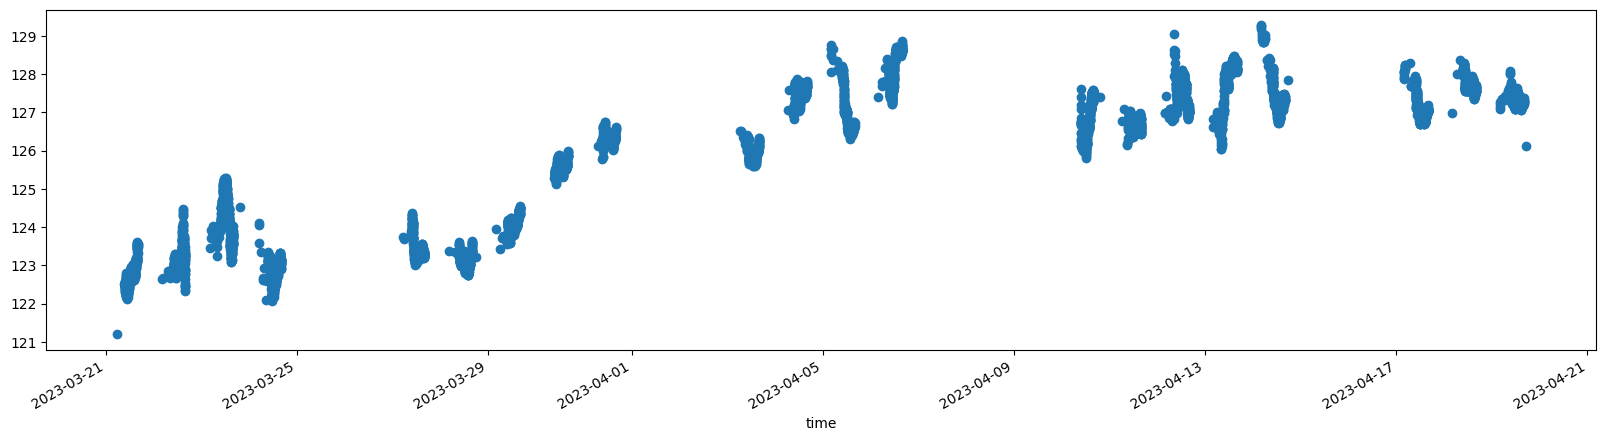

In [ ]:
df["open"].plot(style = "o", figsize = (20,5))

In [ ]:
!pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
response

<Response [200]>

In [ ]:
import os
from alpha_vantage.timeseries import TimeSeries

# Alpha Vantage API key here
api_key = 'UHZRH3WERMUPWONL'

# Define the stock ticker symbol and exchange code
ticker = 'DAI'
exchange = 'FRA'

ts = TimeSeries(key = api_key, output_format = 'pandas')
data, metadata = ts.get_intraday("AAPL", interval = "1min", outputsize = "full")
data

ModuleNotFoundError: ignored

## Use alphavantage to get price time series

In [ ]:
# Define the API key and the ticker symbol for the security you want to get the price for
api_key = 'YOUR_API_KEY'
ticker_symbol = 'ADS.DE'

# Set the API endpoint and parameters for the price time series
endpoint = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY_ADJUSTED',
    'symbol': ticker_symbol,
    'outputsize': 'full',
    'apikey': api_key
}

# Send a request to the API and get the price data
response = requests.get(endpoint, params=params)
price_data = response.json()['Time Series (Daily)']

# Convert the price data to a Pandas DataFrame
price_df = pd.DataFrame.from_dict(price_data, orient='index')
price_df.index = pd.to_datetime(price_df.index)
price_df.sort_index(inplace=True)
price_df = price_df.astype(float)

In [ ]:
df_cfd_price = price_df[["5. adjusted close"]].copy()
df_cfd_price.columns = ["close"]

In [ ]:
#reasmplet to daily to use time_to_expiry
df_cfd_price = df_cfd_price.resample('D').ffill()

In [ ]:
df_cfd_price.head(3)

In [ ]:
#add expiries
min_list = list(range(5,11))
max_list = list(range(8,11))
df_cfd_price_dte = add_expiries_to_df(df_cfd_price, min_list, max_list)

## use BBG data from the terminal in FS

In [ ]:
def BBG_df_per_sheet(path):
    xslsx = pd.ExcelFile(fr"{path}")
    df_dict = {}
    #(2) becaus copied each sheet as values
    sheet_name_list = [x for x in xslsx.sheet_names if "(2)" in x]
    for sheet_name in sheet_name_list:
      df = pd.read_excel(xslsx, sheet_name=sheet_name)
      df["Minute"] = pd.to_datetime(df["Minute"]) 
      df = df.set_index("Minute")
      df = df.rename(columns = {"LAST_PRICE":"close"})
      df.index = pd.to_datetime(df.index)
      df.sort_index(inplace=True)
      df = df.astype(float)
      exec('sheet_string = "' + sheet_name + '".replace(" ", "_")')
      exec('sheet_string = sheet_string.replace("_(2)", "")')
      # exec(sheet_string + " = 'sth'")
      exec("df_dict[sheet_string] = df")
    return df_dict

In [ ]:
df_dict = BBG_df_per_sheet(r"/content/gdrive/MyDrive/Thesis/BBG_2023_04_15.xlsx")

In [ ]:
df_dict.keys()

dict_keys(['TSLA_US_Equity', 'ADS_GY_Equity', 'CSGN_SE_Equity', 'BTC_Index'])

In [ ]:
def plot_BBG_data(df_dict):
  for i, df in enumerate(df_dict.values()):
    title = list(df_dict.keys())[i]
    df.plot(title = title)

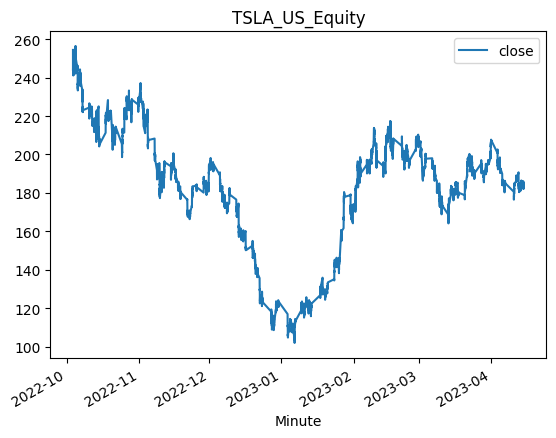

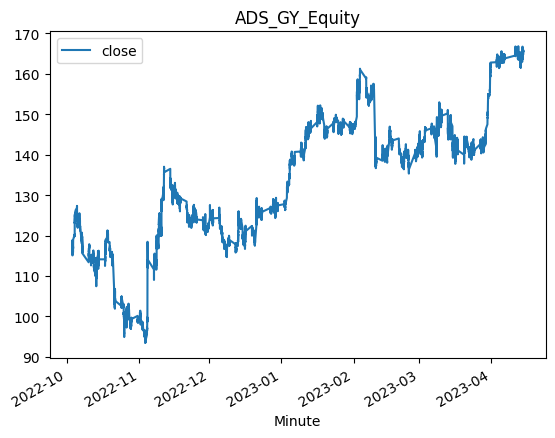

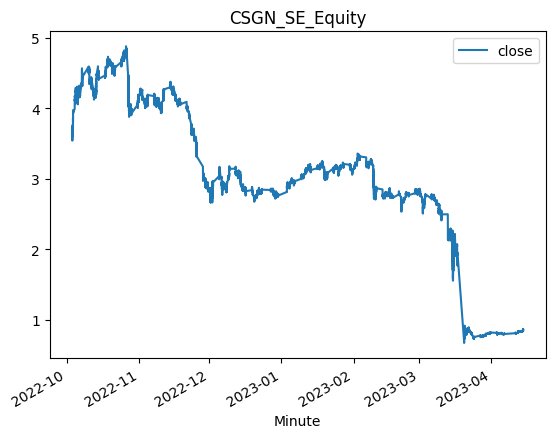

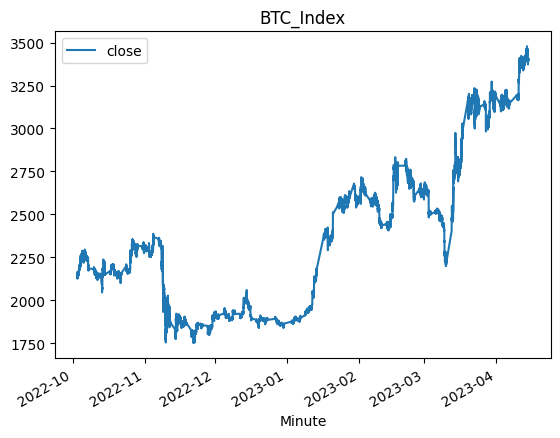

In [ ]:
plot_BBG_data(df_dict)

# Make master df

## add volatility

In [ ]:
#DELETE LATER
def produce_itos_process(len_):
  def inverse_cdf(x):
      return math.sqrt(-2 * math.log(1 - x))

  list_ = []
  for i in range(len_):
      u = random.random()  # generate a uniform random number between 0 and 1
      x = inverse_cdf(u)  # transform the uniform random number into a standard normal random number
      list_.append(x)
  return list_

In [ ]:
example_df = pd.DataFrame({"time": range(90), "close" : produce_itos_process(90)})
example_df = example_df.set_index("time")

In [ ]:
# display(add_vola(test_df).head(30))

In [ ]:
# list(df_dict.values())[0]

In [ ]:
temp = list(df_dict.values())[0]
# temp[temp.index.strftime("%Y-%m-%d %H:%M:%S").str.startswith('2022-10-07')]

In [ ]:
# temp = temp.head(1).drop([
#     "index", 
#     "level_0"
#     ], axis = 1)

In [ ]:
temp = temp.reset_index()

temp[['date', 'H_M_S']] = pd.to_datetime(temp['Minute']).dt.strftime("%Y-%m-%d %H:%M:%S").str.split(' ', n=1, expand=True)

In [ ]:
# temp

In [ ]:
temp.groupby("date")["H_M_S"].size().reset_index(name='count').groupby("count").count()

,date
count,
212,1
391,100
392,32
393,1


In [ ]:
def add_vola_with_dateime(df_, window_days, data_freqeqncy = "minutes"):
    df = df_.copy()
    if data_freqeqncy == "minutes":
      window = int(window_days*390)
    df[f"{window_days}td_vola"] = df["close"].rolling(window, min_periods=window).apply(lambda x: np.std(x))
    return df

In [ ]:
temp = list(df_dict.values())[0] 

for window in [1, 5, 21, 63]:
  temp = add_vola_with_dateime(temp, window)

<Axes: xlabel='Minute'>

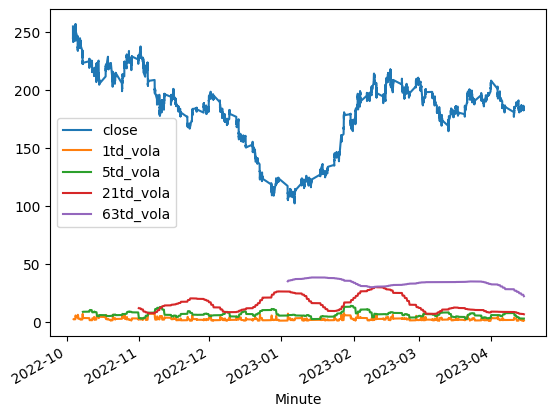

In [ ]:
temp.plot()

In [ ]:
df_dict_wvola = df_dict.copy()

In [ ]:
for df in list(df_dict_wvola.keys()):
   for window in [1, 5, 21, 63]:
    exec('df_dict_wvola["'+ df + '"] = add_vola_with_dateime(df_dict_wvola["'+ df + '"],' + str(window) +')')
    # exec('display(df_dict_wvola["'+ df + '"])')

<Axes: xlabel='Minute'>

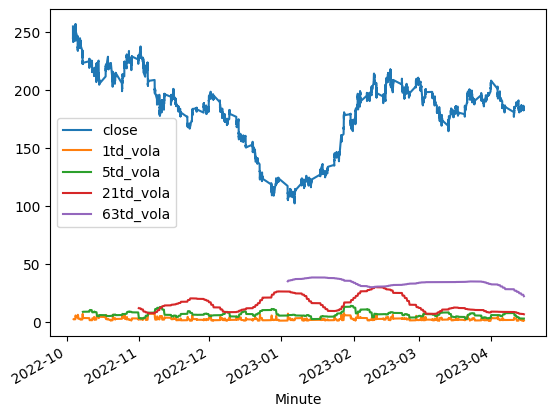

In [ ]:
df_dict_wvola["TSLA_US_Equity"].plot()

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "wb") as f:
    pickle.dump(df_dict_wvola, f)

## Import my data

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "rb") as f:
  df_dict_wvola = pickle.load(f)

In [ ]:
df_dict_wvola

{'TSLA_US_Equity':                        close  1td_vola  5td_vola  21td_vola  63td_vola
 Minute                                                                
 2022-10-03 15:30:00  254.455       NaN       NaN        NaN        NaN
 2022-10-03 15:31:00  252.511       NaN       NaN        NaN        NaN
 2022-10-03 15:32:00  250.430       NaN       NaN        NaN        NaN
 2022-10-03 15:33:00  247.990       NaN       NaN        NaN        NaN
 2022-10-03 15:34:00  247.694       NaN       NaN        NaN        NaN
 ...                      ...       ...       ...        ...        ...
 2023-04-14 21:56:00  184.890  0.912756  2.541598   6.264118  21.810848
 2023-04-14 21:57:00  184.960  0.909585  2.537540   6.263326  21.807261
 2023-04-14 21:58:00  185.060  0.905787  2.533518   6.262533  21.803662
 2023-04-14 21:59:00  185.000  0.901772  2.528544   6.261862  21.800042
 2023-04-14 22:29:00  185.000  0.903305  2.522250   6.261265  21.796418
 
 [52249 rows x 5 columns],
 'ADS_GY_Equity':

## Add rf

In [ ]:
#dont move this function into Functions.ipynb
import pandas_datareader as pdr
def add_rf(df_, horizon = "3m", df_freqency = "T"):
  df = df_.copy()
  
  #start and end_date to get risk free rate
  start_date = min(df.index) - relativedelta(months=1)
  end_date = max(df.index)

  #For  German 3-month Government Bond Yield IRLTLT01DEM156N
  #For  German 10-year Government Bond Yield IR3TIB01DEM156N
  III_m_rf = 'IR3TIB01DEM156N'
  X_y_rf = 'IR3TIB01DEM156N'

  #whoch risk free rate
  if horizon == "3m": #else: 10 year bond
    selection = III_m_rf
  if selection == III_m_rf:
    title = "Three month Interbank Rates: Total for Germany"
  elif selection == X_y_rf:
    title = "Long-Term Government Bond Yields: 10-Year"

  
  risk_free_rate = pdr.DataReader(selection, 'fred', start_date, end_date)
  #set DATE as index for risk_free_rate
  # risk_free_rate.iloc[:,0] = pd.to_datetime(risk_free_rate.iloc[:,0])
  
  #resample to minute
  risk_free_rate = risk_free_rate.resample(df_freqency).ffill()

  df = df.join(risk_free_rate, how = "left")
  df = df.rename(
      columns = {df.columns[-1]:"rf"})

  df["rf"] = df["rf"].ffill()

  return df

In [ ]:
for df in list(df_dict_wvola.keys()):
  exec('df_dict_wvola["'+ df + '"] = Functions.add_rf(df_dict_wvola["'+ df + '"], horizon = "3m", df_freqency = "T")')

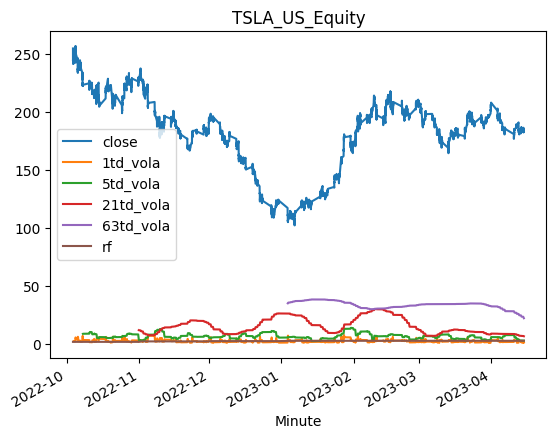

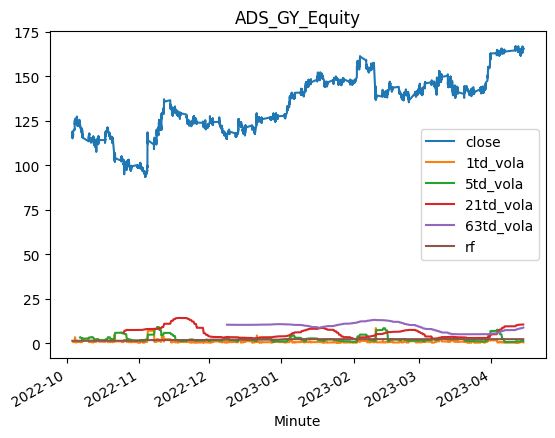

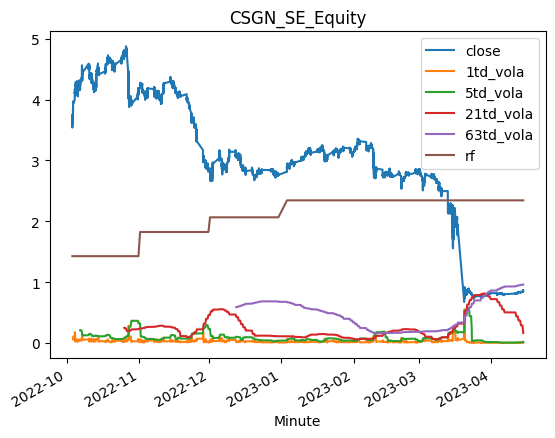

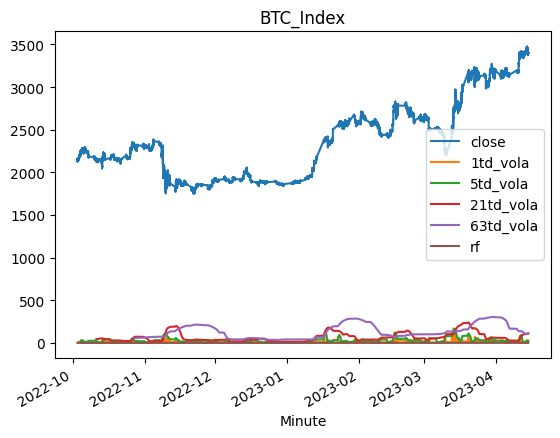

In [ ]:
for df in list(df_dict_wvola.keys()):
  title = df
  exec('df_dict_wvola["'+ df + '"].plot(title = title)')

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "wb") as f:
    pickle.dump(df_dict_wvola, f)

## add time to expiry tte_min_to_max

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "rb") as f:
  df_dict_wvola = pickle.load(f)

In [ ]:
# for i in df_dict_wvola.values():
#   display(i)

In [ ]:
def add_time_to_expiry_with_index(df, max, min):
    """
    takes a df indexed with time
    adds index difference between rows (tte (="time to expiry"))
    resets index difference when  it becomes less than min
    """
    tte_list = []
    tte = max
    tte_list.append(tte)
    for i in range(1, len(df)):
      diff = (df.index[i] - df.index[i-1]).days
      tte -= diff
      if tte < min:
        tte = max
      tte_list.append(tte)
    df[f'tte_{min}_to_{max}'] = tte_list
    return df

In [ ]:
# add_time_to_expiry_with_index(list(df_dict_wvola.values())[0], 63, 1)

In [ ]:
for df in list(df_dict_wvola.keys()):
  for min in [0, 5, 21]:
    for max in [5, 21, 63]:
      exec('df_dict_wvola["'+ df + '"] = add_time_to_expiry_with_index(df_dict_wvola["'+ df + f'"], {max}, {min})')
      # exec('add_time_to_expiry_with_index(df_dict_wvola["'+ df + f'"], {max}, {min})')

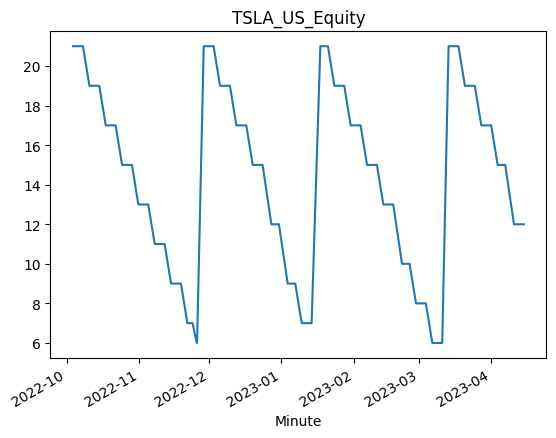

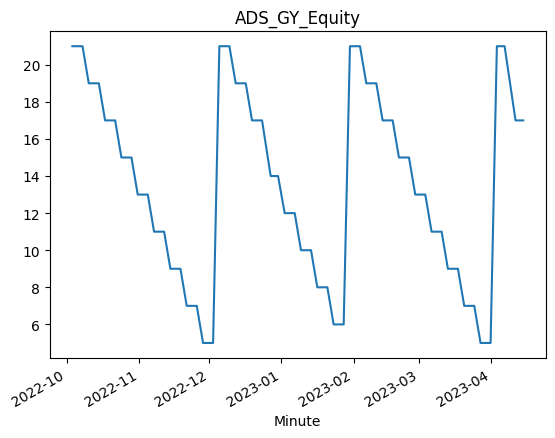

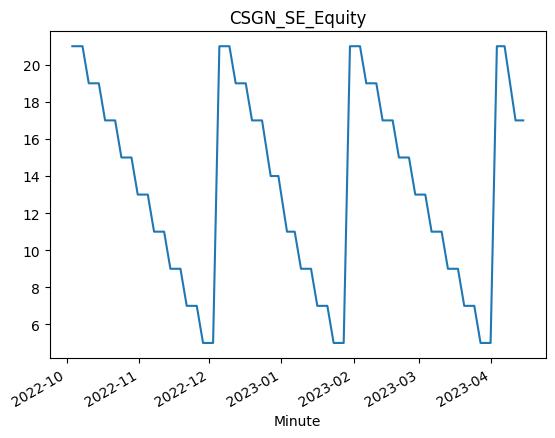

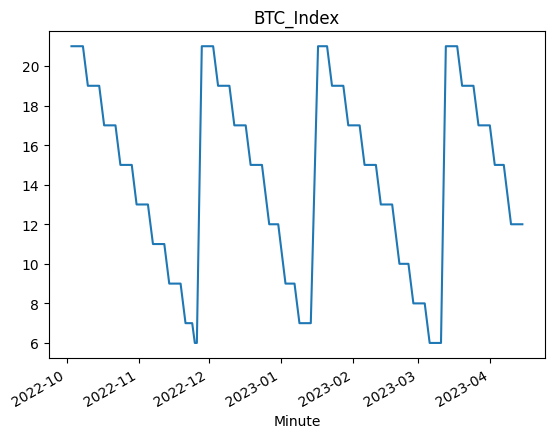

In [ ]:
for i in df_dict_wvola.keys():
  title = i
  df_dict_wvola[i]["tte_5_to_21"].plot(title = title)
  plt.show()

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "wb") as f:
    pickle.dump(df_dict_wvola, f)

# Estimate time series

## load data

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "rb") as f:
  df_dict_wvola = pickle.load(f)

## Simply take last day-

In [ ]:
def objective(trial):
  


### define initial portfolio

In [ ]:
def construct_portfolio(underlying, n_cfds):
    possibilities = {"State": ["active", "inactive"],
                 "Underlying": list(df_dict_wvola.values())[0]["close"],
                 "Stop Loss": np.arange(0,1,0.1),
                 "Take Profit": np.arange(0,1,0.1),
                 "Order Price": np.arange(max(list(df_dict_wvola.values())[0]["close"])), 
                 "Leverage": [*list(np.arange(2,10)),10,20,50],
                 "Timeout": [10,100,1000,2000,4000,6000,8000,10000]
                 }
  portfolio =  pd.DataFrame(columns = ["State", "Underlying", "Stop Loss", "Take Profit", "Order Price", "Leverage", "Timeout"])
  for i in range(n_cfds):
    

SyntaxError: ignored

### define active period of a cfd

In [ ]:
def cfd_value(
    underlying,
    tp_sl_window = 1850,
    stop_l = 0.5,
    take_p = 0.5,
    # order_price,
    leverage = 4,
    timeout = 10000
    ):
    """
    underlying is a price series
    tp_sl_window is how many timestamps the stoploss or take profit is "alive"
    timeout is number
    """
    prices = underlying.copy()
    cfd_lifetime_value = prices * leverage
    series = cfd_lifetime_value
    pct_changes = series.pct_change(periods = tp_sl_window)
    for i, pct_change in enumerate(pct_changes):
        if pct_change <= stop_l:
            return series.iloc[:i + tp_sl_window]
        elif pct_change >= take_p:
            return series.iloc[:i + tp_sl_window]
    return series

In [ ]:
len(cfd_value(
    underlying = list(df_dict_wvola.values())[0]["close"],

))

3700

In [ ]:
len(list(df_dict_wvola.values())[0]["close"])

52249

In [ ]:
def initial_portfolio(underlying, target_number,  target_scheme):
  if target_scheme = "90-10":


In [ ]:
def keep_cfd_number(portfolio, target_number):
  portfolio = cfd_value(underlying,
                        tp_sl_window = 1850, 
                        stop_l = 0.5,
                        take_p = 0.5,
                        # order_price,
                        leverage = 4,
                        # timeout 
                        )

In [ ]:
 bnhvcggfz,list(df_dict_wvola.values())[0]["close"]

Minute
2022-10-03 15:30:00    254.455
2022-10-03 15:31:00    252.511
2022-10-03 15:32:00    250.430
2022-10-03 15:33:00    247.990
2022-10-03 15:34:00    247.694
                        ...   
2023-04-14 21:56:00    184.890
2023-04-14 21:57:00    184.960
2023-04-14 21:58:00    185.060
2023-04-14 21:59:00    185.000
2023-04-14 22:29:00    185.000
Name: close, Length: 52249, dtype: float64

## Prophet

In [ ]:
def fit_prophet(price_series, return_df = True):
  # Load and fill data gaps
  df = price_series.resample('T').ffill()
  df = df.reset_index()
  df.columns = ["ds", "y"]

  # create a Prophet model
  model = Prophet()
  
  if return_df == True:
    return model.fit(df), df

  # fit the model to the data
  return model.fit(df)

  # Make predictions with quantile intervals
  # forecast = model.predict(future_dates)
  # forecast[['ds', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
def rolling_pred_prophet(price_series, start = None , end = None, 
                         min_period = 12000, pred_horizon = 3000, rebalance_period = 3000,
                         time_frequency = "minutes",
                         shift_period = 1,
                         draw_plot = False):
  
    df_all = price_series.copy()

    # set start and end of prediction period
    if start is None:
        start = min(price_series.index)
    if end is None:
        end = max(price_series.index)

    # timestamps from which on there will be predictions
    discrete_time = pd.date_range(start=start + pd.Timedelta(min_period, unit= time_frequency),
                                    end=end + pd.Timedelta(pred_horizon, unit=time_frequency), freq="T")
                    
    real_and_pred_dict = {}
    for t in tqdm(discrete_time[::rebalance_period]):
        # prepare series df as to be from t - min_period and up to t - shift_period to avoid lookahead bias
        df_all_resampled = df_all.copy().resample('T').ffill()
        df_realized = df_all_resampled
        df_realized = df_realized.loc[
            np.logical_and(df_realized.index >= t - pd.Timedelta(min_period, unit= time_frequency),
                        df_realized.index < t - pd.Timedelta(shift_period, unit= time_frequency)), 
                    :]
        df = df_all_resampled.loc[
            np.logical_and(df_all_resampled.index >= t - pd.Timedelta(min_period, unit= time_frequency), 
                        df_all_resampled.index < t - pd.Timedelta(shift_period + pred_horizon, unit= time_frequency)), 
                    :]
        

        # call my fitting function
        fitted_model, df = fit_prophet(df)
        # define prediction df
        if time_frequency == "minutes":
            prediction_freq = "T"
        future = fitted_model.make_future_dataframe(periods=pred_horizon, freq=prediction_freq)
        forecast = fitted_model.predict(future)
        
        temp1 = pd.DataFrame.from_dict({"time": df_realized.index, "value": df_realized.iloc[:,0].values})
        temp2 = pd.DataFrame.from_dict({"time": forecast["ds"], "value": forecast["yhat"]})
        temp = temp1.merge(temp2, on = "time", how = "outer")
        temp = temp.set_index(temp.iloc[:,0])
        temp = temp.iloc[:,1:]
        temp.columns = ["realized", "forecast"]
        
        # plot
        if draw_plot == True:
            temp.plot()
            plt.show()
        
        # dictionary of preds and real values
        real_and_pred_dict[t] = temp
    return real_and_pred_dict

  0%|          | 0/90 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/cqpwhgvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/bq98g0g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36543', 'data', 'file=/tmp/tmpk1wka8gw/cqpwhgvy.json', 'init=/tmp/tmpk1wka8gw/bq98g0g5.json', 'output', 'file=/tmp/tmpk1wka8gw/prophet_modelj9f6i2ve/prophet_model-20230423153051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  1%|          | 1/90 [00:11<17:21, 11.71s/it]DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/ih25ur5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/ls9baqpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdst

{Timestamp('2022-10-11 23:30:00', freq='3000T'):                      realized    forecast
 time                                     
 2022-10-03 15:30:00   254.455  247.218444
 2022-10-03 15:31:00   252.511  247.195240
 2022-10-03 15:32:00   250.430  247.171941
 2022-10-03 15:33:00   247.990  247.148549
 2022-10-03 15:34:00   247.694  247.125065
 ...                       ...         ...
 2022-10-11 23:24:00   216.500  223.684069
 2022-10-11 23:25:00   216.500  223.677311
 2022-10-11 23:26:00   216.500  223.670562
 2022-10-11 23:27:00   216.500  223.663826
 2022-10-11 23:28:00   216.500  223.657102
 
 [11999 rows x 2 columns],
 Timestamp('2022-10-14 01:30:00', freq='3000T'):                      realized    forecast
 time                                     
 2022-10-05 17:30:00   233.360  235.222269
 2022-10-05 17:31:00   233.435  235.244428
 2022-10-05 17:32:00   233.825  235.266622
 2022-10-05 17:33:00   233.940  235.288849
 2022-10-05 17:34:00   233.610  235.311110
 ...           

In [ ]:
real_and_pred_dict = rolling_pred_prophet(
    price_series = list(df_dict_wvola.values())[0][["close"]],
    draw_plot = False
)

In [ ]:
list(df_dict_wvola.values())[0][["close"]]

,close
Minute,
2022-10-03 15:30:00,254.455
2022-10-03 15:31:00,252.511
2022-10-03 15:32:00,250.430
2022-10-03 15:33:00,247.990
2022-10-03 15:34:00,247.694
...,...
2023-04-14 21:56:00,184.890
2023-04-14 21:57:00,184.960
2023-04-14 21:58:00,185.060


In [ ]:
"""
prophet_model_outputs is the dict containing the dictionaries with config as key 
each dictionary with config as key has a dict of prediction vs forecast.
it is indexed by minperiod_predhorizon_rebalance_period
"""
min_period = 12000 
pred_horizon = 3000 
rebalance_period = 3000

#define the configs
combo1 = f"inp{min_period}_pred{pred_horizon}_reb{rebalance_period}"
combos = [combo1]

dict_prophets = {}
for config in combos:
    #prophet_model_outputs
    prophet_model_outputs = {}
    for df in list(df_dict_wvola.keys()):
        exec('dict_prophets["'+ df +'"] = {}')
        exec('dict_prophets["'+ df +'"][config] = rolling_pred_prophet(    \
            price_series = df_dict_wvola["'+ df + '"][["close"]],          \
            min_period=min_period, pred_horizon=pred_horizon, rebalance_period=rebalance_period,                    \
            draw_plot = False)')

  0%|          | 0/90 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/v7yya_n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/_2mvi6ee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9671', 'data', 'file=/tmp/tmpk1wka8gw/v7yya_n7.json', 'init=/tmp/tmpk1wka8gw/_2mvi6ee.json', 'output', 'file=/tmp/tmpk1wka8gw/prophet_modely5y76xsc/prophet_model-20230423194632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  1%|          | 1/90 [00:11<17:43, 11.95s/it]DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/u1jw8vzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/oxfqxp2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdsta

In [ ]:
import pickle
full_path = "/content/gdrive/MyDrive/Thesis/BBG_230415prophets.pickle"
with open(full_path, "wb") as f:
    pickle.dump(dict_prophets, f)

In [ ]:
import pickle
full_path = "/content/gdrive/MyDrive/Thesis/BBG_230415prophets.pickle"
with open(full_path, "rb") as f:
  tmppp = pickle.load(f)

In [ ]:
tmppp

{'TSLA_US_Equity': {'inp12000_pred3000_reb3000': {Timestamp('2022-10-11 23:30:00', freq='3000T'):                      realized    forecast
   time                                     
   2022-10-03 15:30:00   254.455  247.218444
   2022-10-03 15:31:00   252.511  247.195240
   2022-10-03 15:32:00   250.430  247.171941
   2022-10-03 15:33:00   247.990  247.148549
   2022-10-03 15:34:00   247.694  247.125065
   ...                       ...         ...
   2022-10-11 23:24:00   216.500  223.684069
   2022-10-11 23:25:00   216.500  223.677311
   2022-10-11 23:26:00   216.500  223.670562
   2022-10-11 23:27:00   216.500  223.663826
   2022-10-11 23:28:00   216.500  223.657102
   
   [11999 rows x 2 columns],
   Timestamp('2022-10-14 01:30:00', freq='3000T'):                      realized    forecast
   time                                     
   2022-10-05 17:30:00   233.360  235.222269
   2022-10-05 17:31:00   233.435  235.244428
   2022-10-05 17:32:00   233.825  235.266622
   2022-10-05 

In [ ]:
temp = list(df_dict_wvola.values())[0][["close"]]
test = fit_prophet(temp)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/n3_4dly0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1wka8gw/funo7ero.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19551', 'data', 'file=/tmp/tmpk1wka8gw/n3_4dly0.json', 'init=/tmp/tmpk1wka8gw/funo7ero.json', 'output', 'file=/tmp/tmpk1wka8gw/prophet_modelqp5eiuhz/prophet_model-20230423151055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


KeyboardInterrupt: ignored

In [ ]:
df_temp = temp.resample('T').ffill()
df_temp = df_temp.reset_index()
df_temp.columns = ["ds", "y"]
df_temp
future = test.make_future_dataframe(periods=len(df_temp), freq='T')
forecast = test.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
forecast_indexed = forecast.set_index("ds")
for i in forecast_indexed.columns:
  title = i
  forecast_indexed[i].plot(title = title)
  plt.show()

## Markov switching autoregression models

In [ ]:
# def fit_MS_AR(price_col, k_regimes = 3, order = 390, switching_variance=True):
#   price_series = price_col.resample('T').ffill()
#   price_series = price_col.dropna()
#   # print(price_series.head(2))
#   # price_series.plot()
#   mod_hamilton = sm.tsa.MarkovAutoregression(
#       price_series, k_regimes = k_regimes, order=order, switching_variance = switching_variance
#   )
#   res_hamilton = mod_hamilton.fit()
#   return res_hamilton

In [ ]:
# temp = list(df_dict_wvola.values())[0][["1td_vola"]]
# for i in range(5):
#   try:
#     print("----------------------------------------------------------------")
#     print(f"compute for i = {i}")
#     test = fit_MS_AR(temp, k_regimes = 2, order = i, switching_variance=True)
#     print(test.summary())
#   except:
#     print("failed")

----------------------------------------------------------------
compute for i = 0
                     1td_vola
Minute                       
2022-10-03 21:59:00  1.932132
2022-10-03 22:29:00  1.865290
failed
----------------------------------------------------------------
compute for i = 1
                     1td_vola
Minute                       
2022-10-03 21:59:00  1.932132
2022-10-03 22:29:00  1.865290


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/regime_switching/markov_autoregression.py:234: RuntimeWarning: divide by zero encountered in true_divide
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/regime_switching/markov_autoregression.py:234: RuntimeWarning: divide by zero encountered in log
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/regime_switching/markov_autoregression.py:234: RuntimeWarning: invalid value encountered in subtract
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: Valu

failed
----------------------------------------------------------------
compute for i = 2
                     1td_vola
Minute                       
2022-10-03 21:59:00  1.932132
2022-10-03 22:29:00  1.865290
failed
----------------------------------------------------------------
compute for i = 3
                     1td_vola
Minute                       
2022-10-03 21:59:00  1.932132
2022-10-03 22:29:00  1.865290


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


failed
----------------------------------------------------------------
compute for i = 4
                     1td_vola
Minute                       
2022-10-03 21:59:00  1.932132
2022-10-03 22:29:00  1.865290


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


failed


In [ ]:
test.summary()

AttributeError: ignored

In [ ]:
 # add_time_to_expiry_with_index(list(df_dict_wvola.values())[0], 63, 1)["remaining"].plot(style = "o")

In [ ]:
# #make date to datetime
# df_cfd_price_dte = df_cfd_price_dte.reset_index()
# df_cfd_price_dte = df_cfd_price_dte.rename(columns = {"index": "date"})
# df_cfd_price_dte["date"] = pd.to_datetime(df_cfd_price_dte["date"])
# df_cfd_price_dte = df_cfd_price_dte.set_index("date")

In [ ]:
# #make date to datetime
# risk_free_rate = risk_free_rate.reset_index()

In [ ]:
# risk_free_rate.iloc[:,0] = pd.to_datetime(risk_free_rate.iloc[:,0])

In [ ]:
# set DATE as index for risk_free_rate
# risk_free_rate = risk_free_rate.set_index("DATE")

In [ ]:
# #merge the dfs
# df_cfd_price_dte_rf = df_cfd_price_dte.join(risk_free_rate, how = "left")
# df_cfd_price_dte_rf = df_cfd_price_dte_rf.rename(
#     columns = {df_cfd_price_dte_rf.columns[-1]:"rf"})

In [ ]:
# risk_free_rate = risk_free_rate.set_index(risk_free_rate.iloc[:,0])

In [ ]:
# #forward fill rf
# df_cfd_price_dte_rf["rf"] = df_cfd_price_dte_rf["rf"].ffill()

In [ ]:
# display(df_cfd_price_dte_rf.head(2))
# display(df_cfd_price_dte_rf.tail(2))

at this point have

* close
* 30_d_vola
* dte (days to expiry in interval [x, y])
* rf (3 month Interbank rate)

## Brownian 

# https://github.com/bottama/stochastic-asset-pricing-in-continuous-time

### load data

In [ ]:
import pickle
full_path = "BBG_23_04_15.pickle"
with open(full_path, "rb") as f:
  df_dict_wvola = pickle.load(f)

### fit the model

In [ ]:
def fit_brownian_motion(
    #df with price col
    df,
    #price column of df
    close_col = "close",
    #proportion of test set
    test_size = 0.2,
    #random state to make model replicable
    random_state = 42,
    #length of prediction horizon
    T = 2000,
    #number of scenarios
    scen_size = 100,
    #draw?
    draw_plot = False,
    #Hyperparameters:
    drift_w1 = 0.1,
    drift_w2 = 2,
    title = "Unnamed"
    ):


    ##variables calucluated with inputs
    # make test and train set
    simu_df = df.copy()
    simu_p = simu_df[close_col]
    y_train, y_test = train_test_split(simu_p, test_size=test_size, random_state = random_state)
    #value of stochastic process at end of series of observations
    So = y_train[-1]
    #time steps assumed to be 1 (1 min)
    dt = 1
    #number of preds
    N = T / dt
    #time progression
    t = np.arange(1, int(N) + 1)
    #make prediction column
    daily_returns = ((y_train / y_train.shift(1)) - 1)[1:]
    #arithmetic mean
    mu = np.mean(daily_returns)
    #standard deviation
    sigma = np.std(daily_returns)

    ##brownian motion paths
    #create b as a dictionary with a key from i to scen_size and values from norm dist.
    b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
    # "Brownian Path" cumsum of b as the hypothesiszed path
    W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
    #drift: average rate of change of log of RV.
    drift    = (mu - drift_w1 * sigma ** drift_w2) * t    
    # diffusion: volatility, (proportional to the sqt of t)
    diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

    # Stock price
    S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
    #add So to each prediction path using np.hstack()
    S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
    S_max          = [S[:, i].max() for i in range(0, int(N))]
    S_min          = [S[:, i].min() for i in range(0, int(N))]
    # S_pred         = .5 * np.array(S_max) + .5 * np.array(S_min)
    S_pred = [sum(S[:, i])/len(S[:, i]) for i in range(int(N))]
    # S_pred = [sum(S[:, i])/len(S[:, i]) for i in range(int(N))]
    final_df       = pd.DataFrame(data=[y_test.values, S_pred],
                                #   index=['real', 'pred']
                                ).T
    final_df.index = y_test.index
    mse            = 1/len(final_df) * np.sum((final_df.iloc[:,1] - final_df.iloc[:,0]) ** 2)
    
    if draw_plot == True:
        fig, ax = plt.subplots(figsize=(10, 3))
        temp_df_plot_simu = pd.DataFrame(S).T
        # temp_df_plot_simu = temp_df_plot_simu.sort_values(list(temp_df_plot_simu.index)[-1], axis = 1, ascending = True)
        # ax.set_yscale('log')
        temp_df_plot_simu.iloc[:10,:10].plot(ax = ax, 
                                             legend = False,
                                             title = f"{title} wtih i,j = {i},{j}")
        plt.show()
    return mse

In [ ]:
temp_dict = {}
for i in tqdm(list(range(20, 40))):
    for j in range(100):
        try: 
            temp_dict [i,j] = fit_brownian_motion(
                            #df with price col
                            df = list(df_dict_wvola.values())[0],
                            title = list(df_dict_wvola.keys())[0],
                            #price column of df
                            close_col = "close",
                            #proportion of test set
                            test_size = 0.2,
                            #random state to make model replicable
                            random_state = 42,
                            #length of prediction horizon
                            T = 60,
                            #number of scenarios
                            scen_size = 100,
                            #draw?
                            draw_plot = False,
                            #Hyperparameters:
                            drift_w1 = 10/(10^i),
                            drift_w2 = 10/(10^j))
        except:
            pass

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
import plotly.graph_objs as go

x = [key[0] for key in temp_dict.keys()]
y = [key[1] for key in temp_dict.keys()]
z = np.log(np.log(list(temp_dict.values())))

colors = z

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color=colors, colorscale='Viridis', size=5))])
fig.update_layout(scene=dict(xaxis_title='drift_w1', yaxis_title='drift_w2', zaxis_title='MSE'))

# Show the plot
fig.show()

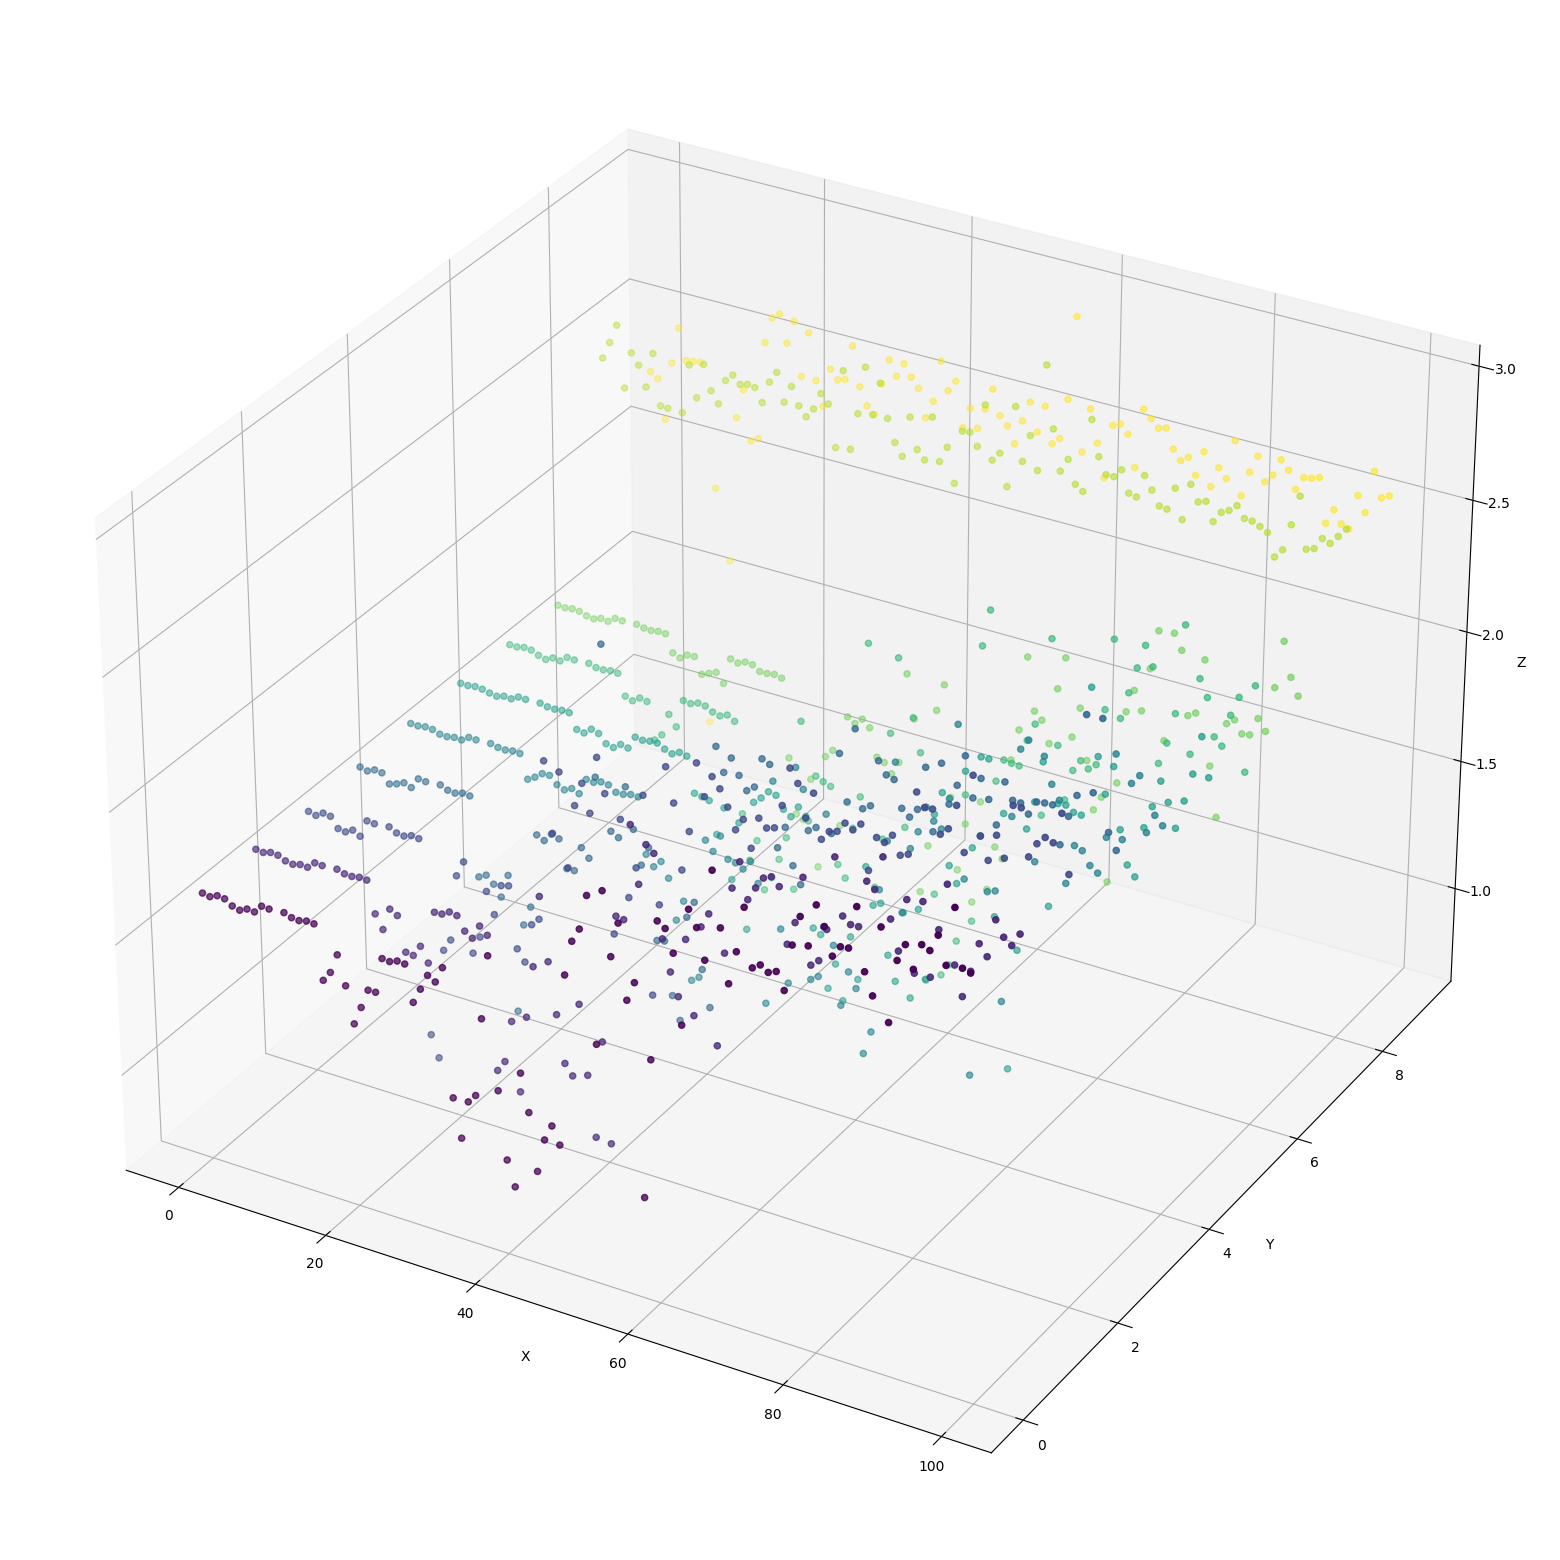

In [ ]:
x = [key[0] for key in temp_dict.keys()]
y = [key[1] for key in temp_dict.keys()]
z = np.log(np.log(list(temp_dict.values())))

colors = y

# Create a 3D scatter plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set the labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [ ]:
# Stock price
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
#add So to each prediction path using np.hstack()
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
S_max          = [S[:, i].max() for i in range(0, int(N))]
S_min          = [S[:, i].min() for i in range(0, int(N))]
# S_pred         = .5 * np.array(S_max) + .5 * np.array(S_min)
S_pred = [sum(S[:, i])/len(S[:, i]) for i in range(int(N))]
final_df       = pd.DataFrame(data=[y_test.values, S_pred],
                            #   index=['real', 'pred']
                              ).T
final_df.index = y_test.index
mse            = 1/len(final_df) * np.sum((final_df.iloc[:,1] - final_df.iloc[:,0]) ** 2)

In [ ]:
final_df#.plot()

,0,1
Minute,,
2022-11-03 19:48:00,216.100,179.815000
2022-10-05 17:41:00,234.890,159.954569
2023-03-06 21:14:00,194.906,148.445964
2022-10-14 17:41:00,211.190,134.532973
2023-01-23 17:07:00,140.702,122.794156
...,...,...
2022-12-01 18:22:00,194.402,NaN
2023-02-06 21:00:00,195.040,NaN
2022-12-20 16:54:00,145.394,NaN


In [ ]:
##function inputs
#df
simu_df = list(df_dict_wvola.values())[0]
#price column of df
simu_p = simu_df["close"]
#proportion of test set
test_size = 0.2
#random state to make model replicable
random_state = 42
#length of prediction horizon
T = 2000
#number of scenarios
scen_size = 100
#Hyperparameters:
drift_w1 = 0.5
drift_w2 = 1


##variables calucluated with inputs
# make test and train set
y_train, y_test = train_test_split(simu_p, test_size=test_size, random_state = random_state)
#value of stochastic process at end of series of observations
So = y_train[-1]
#time steps assumed to be 1 (1 min)
dt = 1
#number of preds
N = T / dt
#time progression
t = np.arange(1, int(N) + 1)
#make prediction column
minute_returns = ((y_train / y_train.shift(1)) - 1)[1:]
#arithmetic mean
mu = np.mean(minute_returns)
#standard deviation
sigma = np.std(minute_returns)

##brownian motion paths
#create b as a dictionary with a key from i to scen_size and values from norm dist.
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
# "Brownian Path" cumsum of b as the hypothesiszed path
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
#drift: average rate of change of log of RV.
drift    = (mu - drift_w1 * sigma ** drift_w2) * t    
# diffusion: volatility, (proportional to the sqt of t)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Stock price
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
#add So to each prediction path using np.hstack()
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

S_max          = [S[:, i].max() for i in range(0, int(N))]
S_min          = [S[:, i].min() for i in range(0, int(N))]
# S_pred         = .5 * np.array(S_max) + .5 * np.array(S_min)
S_pred = [sum(S[:, i])/len(S[:, i]) for i in range(int(N))]
# S_pred         = [S[:, i].median() for i in range(0, int(N))]
S_pred         = np.median(S, axis=0)
final_df       = pd.DataFrame(data=[y_test.values, S_pred],
                            #   index=['real', 'pred']
                              ).T
# final_df.index = y_test.index
mse            = 1/len(final_df) * np.sum((final_df.iloc[:,1] - final_df.iloc[:,0]) ** 2)

In [ ]:
final_df

,0,1
0,216.100,179.815000
1,234.890,154.427186
2,194.906,132.454286
3,211.190,119.493613
4,140.702,113.221178
...,...,...
10445,194.402,NaN
10446,195.040,NaN
10447,145.394,NaN
10448,186.039,NaN


<Axes: title={'center': 'mse: 6505.4773795240035'}>

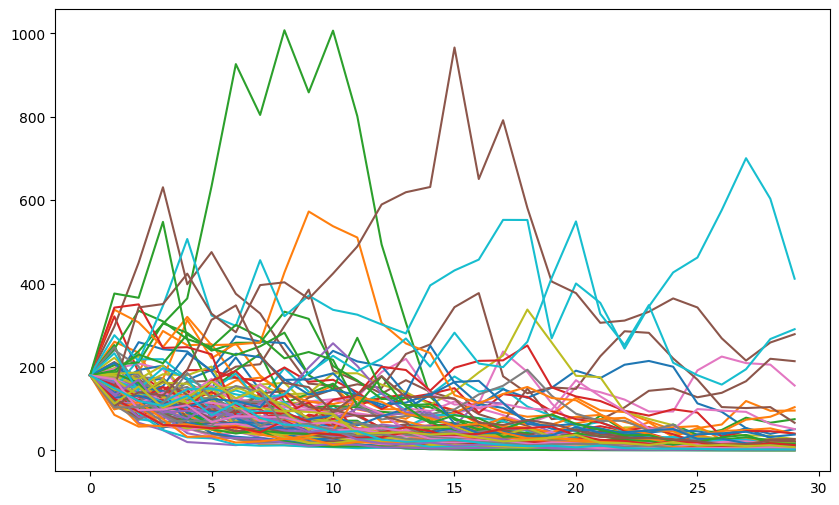

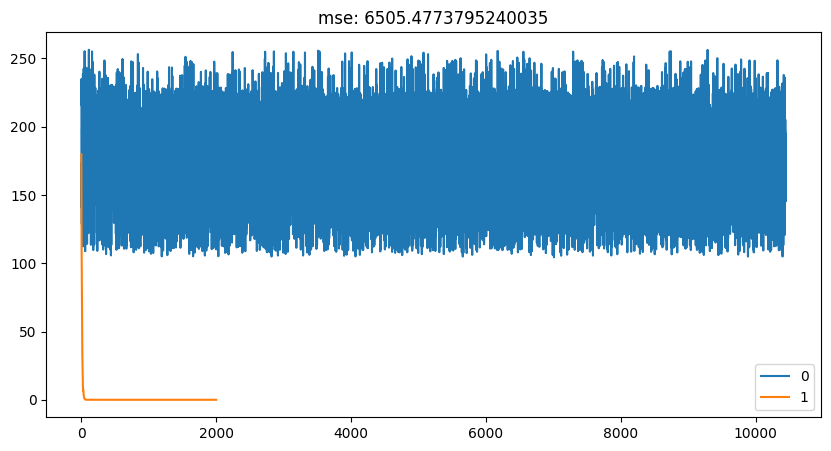

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
temp_df_plot_simu = pd.DataFrame(S).T
# temp_df_plot_simu = temp_df_plot_simu.sort_values(list(temp_df_plot_simu.index)[-1], axis = 1, ascending = True)
# display(temp_df_plot_simu)
# ax.set_yscale('log')
temp_df_plot_simu.iloc[:30,:1000].plot(ax = ax, legend = False)
final_df.plot(title = f"mse: {mse}", figsize = (10,5))

In [ ]:
drift_w1, drift_w2

## Brownian with Jump Diffusion
### https://marketneutralstrategies.medium.com/jump-diffusion-where-geometric-brownian-motion-meets-jumps-c98268ea24b

# Portfolio

https://github.com/Marigold/universal-portfolios/blob/master/examples/Beating%20the%20market%20with%20the%20simple%20possible%20predictive%20metric.ipynb
It is hard to beat the constantly rebalanced portfolio. UCRP means unifrom weights constantly rebalanced (so weights are stable through time) portfolio.

# The class